In [201]:
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

In [202]:
df = pd.read_csv('mustang_release_v1.0beta.csv')

In [203]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24


In [204]:
tstart = pd.to_datetime(df['start_time'])
tsubmit = pd.to_datetime(df['submit_time'])
tend = pd.to_datetime(df['end_time'])

In [205]:
tdiff = (tstart - tsubmit)
trun = (tend - tstart)

In [206]:
tdiff[0].seconds

3532

In [207]:
tdiff.apply(lambda x: x.seconds)

0           3532.0
1             20.0
2             18.0
3              7.0
4             10.0
5              2.0
6             27.0
7              3.0
8              9.0
9             19.0
10             3.0
11             4.0
12            15.0
13            17.0
14            28.0
15            31.0
16            12.0
17            28.0
18            27.0
19             7.0
20             8.0
21             9.0
22             9.0
23             8.0
24             9.0
25            24.0
26            25.0
27            10.0
28            25.0
29            10.0
            ...   
2113145      400.0
2113146     2381.0
2113147       12.0
2113148       12.0
2113149       12.0
2113150     2306.0
2113151     2320.0
2113152     6020.0
2113153     3667.0
2113154       60.0
2113155       10.0
2113156    24702.0
2113157        3.0
2113158    25659.0
2113159       12.0
2113160       12.0
2113161       10.0
2113162        8.0
2113163    11102.0
2113164       10.0
2113165     3570.0
2113166     

In [208]:
df['twait_seconds'] = tdiff.apply(lambda x: x.seconds)

In [209]:
df['trun_seconds'] = trun.apply(lambda x: x.seconds)

In [210]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested,twait_seconds,trun_seconds
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24,3532.0,94.0
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,20.0,7.0
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,18.0,5.0
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,7.0,38.0
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200,10.0,42.0
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,2.0,8.0
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,27.0,96.0
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48,3.0,3.0
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,9.0,72.0
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,19.0,46.0


In [211]:
(df['twait_seconds']/60.0).describe()

count    2.019005e+06
mean     4.497529e+01
std      1.632296e+02
min      0.000000e+00
25%      1.666667e-01
50%      2.500000e-01
75%      5.850000e+00
max      1.439950e+03
Name: twait_seconds, dtype: float64

In [212]:
import matplotlib.pyplot as plt

In [213]:
%matplotlib inline

In [20]:
X=df['node_count']
Y=df['twait_seconds']

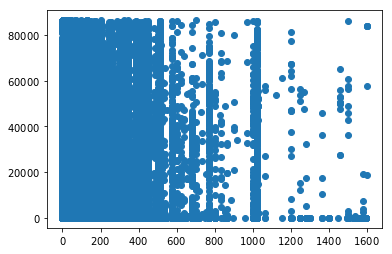

In [21]:
plt.scatter(X,Y)

In [240]:
cdf = df[df['job_status']=='COMPLETED']

In [214]:
#cdf = df

In [215]:
#cdf = cdf[cdf['twait_seconds']/cdf['trun_seconds'] < 2.0]

In [241]:
cdf = cdf[cdf['trun_seconds'] != 0]
cdf = cdf[cdf['trun_seconds'] > 300.0]
cdf = cdf[cdf['trun_seconds'] < 3600*24]

In [242]:
frac_wait = cdf['twait_seconds']/cdf['trun_seconds']

In [243]:
frac_wait.describe()

count    845202.000000
mean          1.775347
std           7.582418
min           0.000000
25%           0.018519
50%           0.040045
75%           0.599614
max         274.498371
dtype: float64

In [244]:
fwait_cdf = ECDF(frac_wait)

In [245]:
import matplotlib

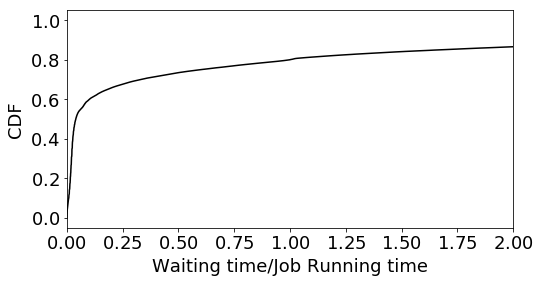

In [257]:
matplotlib.rcParams.update({'font.size': 18})
fig,ax = plt.subplots()
fig.set_size_inches(8,4)

ax.plot(fwait_cdf.x, fwait_cdf.y, color='k')
ax.set_xlabel('Waiting time/Job Running time')
ax.set_ylabel("CDF")
ax.set_xlim((0,2.0))
#ax.grid()
plt.savefig("waiting_all.pdf",bbox_inches='tight')

In [247]:
le_1=cdf[cdf['trun_seconds'] < 3600]

In [265]:
def avg_frac_wait(df):
    frac_wait = df['twait_seconds']/df['trun_seconds']
    return frac_wait, frac_wait.describe()['mean']

In [266]:

avg_frac_wait(le_1)

(12          0.017045
 13          0.054662
 16          0.004261
 18          0.077586
 36          0.036697
 53          0.000864
 54          0.007225
 55          0.007634
 56          0.001270
 57          0.001715
 58          0.002117
 59          0.002154
 60          0.001686
 61          0.008309
 62          0.008471
 63          0.008879
 64          0.000774
 65          0.002567
 66          0.002670
 67          0.003591
 68          0.004043
 69          0.010619
 70          0.002389
 71          0.008592
 73          0.007379
 75          0.280840
 76          0.002291
 77          0.001508
 80          0.011475
 81          0.004413
              ...    
 2112847     0.007670
 2112898     0.005556
 2112913     0.004100
 2112981     0.027101
 2112982    11.927476
 2112984    10.388815
 2113006     0.007216
 2113025     0.642757
 2113029     0.006018
 2113044     0.005381
 2113048     0.289446
 2113050     0.004528
 2113063     0.034091
 2113072     0.017974
 2113073  

In [250]:
le_2=cdf[cdf['trun_seconds'].between(3600,2*3600)]

In [251]:
avg_frac_wait(le_2)

2.4206398187707769

In [272]:
le_4=cdf[cdf['trun_seconds'].between(2*3600,4*3600)]

,0--1
12,0.017045
13,0.054662
16,0.004261
18,0.077586
36,0.036697
53,0.000864
54,0.007225
55,0.007634
56,0.001270
57,0.001715


In [253]:
le_8=cdf[cdf['trun_seconds'].between(4*3600,8*3600)]
avg_frac_wait(le_8)

0.72541435731731119

In [254]:
le_16=cdf[cdf['trun_seconds'].between(8*3600,16*3600)]
avg_frac_wait(le_16)

0.32613828224381136

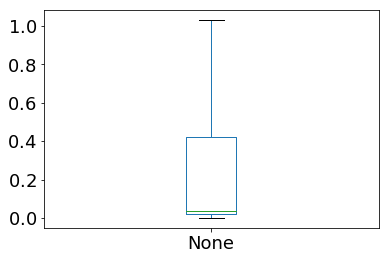

In [268]:
frac_wait=le_1['twait_seconds']/le_1['trun_seconds']
ax=frac_wait.plot(kind='box',showfliers=False)

In [279]:
bucket_df = pd.DataFrame({"0--1":avg_frac_wait(le_1)[0],"1--2":avg_frac_wait(le_2)[0],"2--4":avg_frac_wait(le_4)[0],"4--8":avg_frac_wait(le_8)[0],"8--16":avg_frac_wait(le_16)[0] })

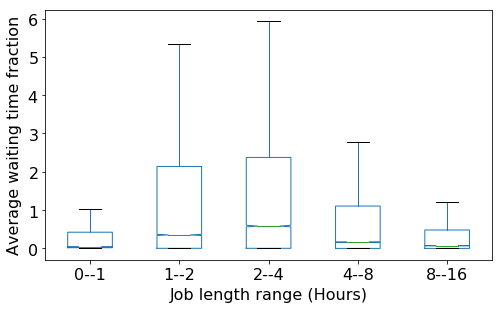

In [297]:
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
fig.set_size_inches(8,4.6)
ax=bucket_df.plot(kind='box', ax=ax, showfliers=False, notch=True,meanline=True)
ax.set_ylabel("Average waiting time fraction")
ax.set_xlabel("Job length range (Hours)")
plt.savefig("../graphs/waiting_time_buckets.pdf",bbox_inches='tight')

In [127]:
efficiency = cdf['trun_seconds']/(cdf['trun_seconds']+cdf['twait_seconds'])

In [128]:
efficiency.describe()

count    731890.000000
mean          0.877183
std           0.176938
min           0.333347
25%           0.847222
50%           0.971429
75%           0.983395
max           1.000000
dtype: float64

In [129]:
cdf['trun_seconds'].describe()

count    731890.000000
mean       3875.113468
std        9810.348355
min         301.000000
25%         446.000000
50%         532.000000
75%        1286.000000
max       82989.000000
Name: trun_seconds, dtype: float64

In [39]:
import numpy as np

(-0.01, 1)

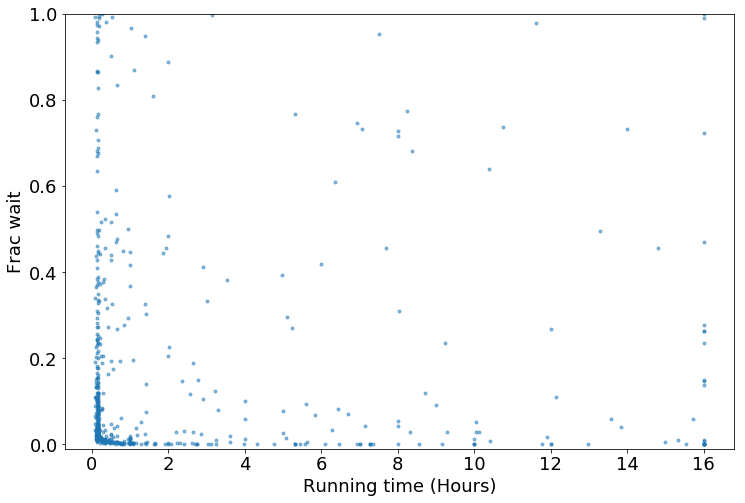

In [40]:
sampled_cdf = cdf.sample(1000)
fig, ax = plt.subplots()

fig.set_size_inches((12,8))
ax.scatter(sampled_cdf['trun_seconds']/3600.0, sampled_cdf['twait_seconds']/sampled_cdf['trun_seconds'], marker='.',alpha=0.5)
ax.set_xlabel("Running time (Hours)")
ax.set_ylabel("Frac wait")
ax.set_ylim((-0.01,1))


(0, 100)

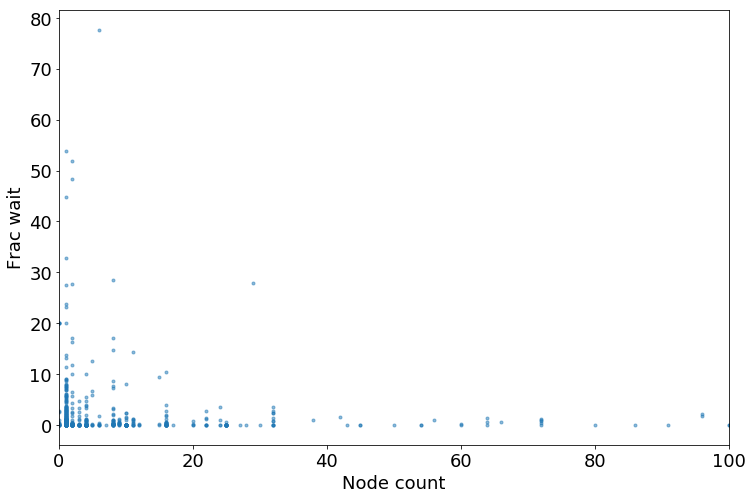

In [41]:
fig, ax = plt.subplots()

fig.set_size_inches((12,8))
ax.scatter(sampled_cdf['node_count'], sampled_cdf['twait_seconds']/sampled_cdf['trun_seconds'],marker='.',alpha=0.5)
ax.set_xlabel("Node count")
ax.set_ylabel("Frac wait")
ax.set_xlim((0,100))
#ax.set_xlim((0.1,1.0))


Text(0,0.5,'twait/trun')

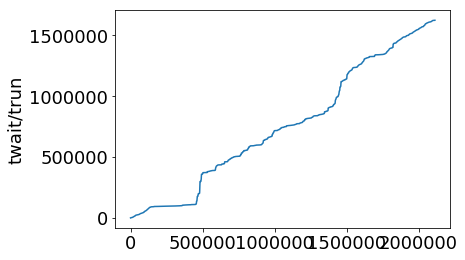

In [42]:
plt.plot(np.cumsum(frac_wait))
plt.ylabel("twait/trun")

In [43]:
plt.plot(np.cumsum(efficiency))
plt.ylabel("R/R+W")

NameError: name 'efficiency' is not defined

In [93]:
#Want the average waiting time for jobs of length smaller than t 

In [44]:
scdf = cdf.sort_values(by=['trun_seconds'])

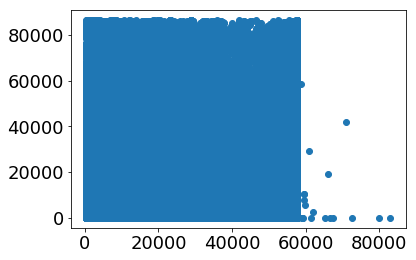

In [45]:
plt.scatter(scdf['trun_seconds'], scdf['twait_seconds'])

In [46]:
cumulative_twait_mean = scdf['twait_seconds'].rolling(window=len(scdf), min_periods=1).mean()

In [47]:
expanding_twait_mean = scdf['twait_seconds'].expanding(min_periods=1).mean()

In [48]:
expanding_twait_mean.describe()

count    998304.000000
mean       1333.464514
std         971.490707
min           5.000000
25%         615.925416
50%         916.782055
75%        1582.322273
max        4309.739413
Name: twait_seconds, dtype: float64

Text(0,0.5,'Average waiting time (cumulative) hours')

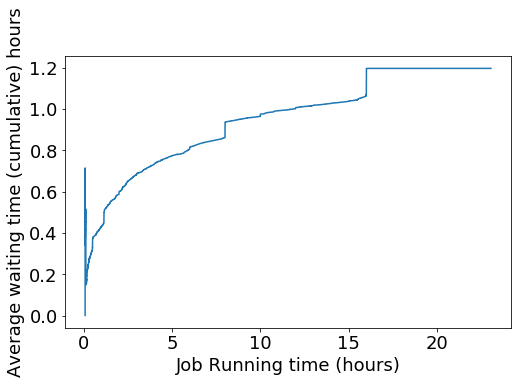

In [50]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
ax.plot(scdf['trun_seconds']/3600.0, cumulative_twait_mean/3600.0)
ax.set_xlabel("Job Running time (hours)")
ax.set_ylabel("Average waiting time (cumulative) hours")

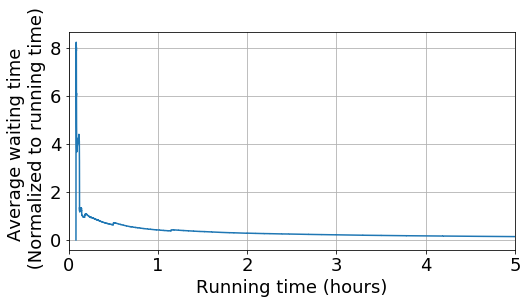

In [59]:
fig,ax = plt.subplots()
fig.set_size_inches(8,4)
ax.plot(scdf['trun_seconds']/3600.0, expanding_twait_mean/scdf['trun_seconds'])
ax.set_xlabel("Running time (hours)")
ax.set_ylabel("Average waiting time \n (Normalized to running time)")
ax.set_xlim((0,5))
ax.grid()
plt.savefig("waiting_cumul.pdf",bbox_inches='tight')

In [104]:
pd.cut(cdf['trun_seconds'], np.arange(0,30*3600,3600))

10              (0, 3600]
12              (0, 3600]
13              (0, 3600]
16              (0, 3600]
18              (0, 3600]
19              (0, 3600]
20              (0, 3600]
21           (3600, 7200]
22           (3600, 7200]
23              (0, 3600]
24              (0, 3600]
25              (0, 3600]
26              (0, 3600]
27              (0, 3600]
28              (0, 3600]
29              (0, 3600]
30              (0, 3600]
31              (0, 3600]
32              (0, 3600]
33              (0, 3600]
34              (0, 3600]
35              (0, 3600]
36              (0, 3600]
37              (0, 3600]
38              (0, 3600]
39              (0, 3600]
40              (0, 3600]
41              (0, 3600]
42              (0, 3600]
43              (0, 3600]
                ...      
2113064         (0, 3600]
2113065    (14400, 18000]
2113067    (25200, 28800]
2113068    (25200, 28800]
2113070    (25200, 28800]
2113072         (0, 3600]
2113073         (0, 3600]
2113074    (

In [108]:
bucketized = cdf['twait_seconds'].groupby(pd.cut(cdf['trun_seconds'], np.arange(0,30*3600,3600))).mean()

In [112]:
bucketized

trun_seconds
(0, 3600]             117.102220
(3600, 7200]         1776.526339
(7200, 10800]        3895.304746
(10800, 14400]       5365.097590
(14400, 18000]       6836.895191
(18000, 21600]       6496.896524
(21600, 25200]      10389.556743
(25200, 28800]       8943.059145
(28800, 32400]      10951.417682
(32400, 36000]       9186.735203
(36000, 39600]      11895.384061
(39600, 43200]      11544.037175
(43200, 46800]      13764.563358
(46800, 50400]      12110.895459
(50400, 54000]      14583.483241
(54000, 57600]      18788.718918
(57600, 61200]         25.000000
(61200, 64800]         29.000000
(64800, 68400]         26.000000
(68400, 72000]               NaN
(72000, 75600]               NaN
(75600, 79200]               NaN
(79200, 82800]               NaN
(82800, 86400]         24.000000
(86400, 90000]               NaN
(90000, 93600]               NaN
(93600, 97200]               NaN
(97200, 100800]              NaN
(100800, 104400]             NaN
Name: twait_seconds, dtype: fl